<h1 style="
font-family: Roboto;
font-size: 3em;
text-align: center;
color: white;
background:#a106f4;
padding: 20px;
margin: 10px;
border-radius: 20px;
text-shadow: 5px 5px 8px rgba(0, 0, 0, 0.8);
">
Twitter Sentiment Analysis
</h1>

<center>
<img src="https://miro.medium.com/v2/resize:fit:1400/1*sDa7Oqnh-zRXPPewKZid4g.png" alt="X Logo" style="max-width: 60%; border-radius:40px; background:white">
</center>

<h1>Importing libraries </h1>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import re

<h1>Loading Dataset</h1>

In [4]:
columns_names = ['target', 'id', 'date', 'flag', 'user', 'text']

twitter_data=pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv',names=columns_names, encoding = 'ISO-8859-1')
twitter_data

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


<h1>Exploring and Pre-Processing</h1>

# Exploratory Data Analysis

In [5]:
print(twitter_data.head())
print("\n\n")
print(twitter_data.describe())
print("\n\n")
print(twitter_data.info())
print("\n\n")
print(twitter_data.shape)

   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  



             target            id
count  1.600000e+06  1.600000e+06
mean   2.000000e+00  1.998818e+09
std    2.000001e+00  1.935761e+08
min    0.000000e+00  1.467810e+09
25% 

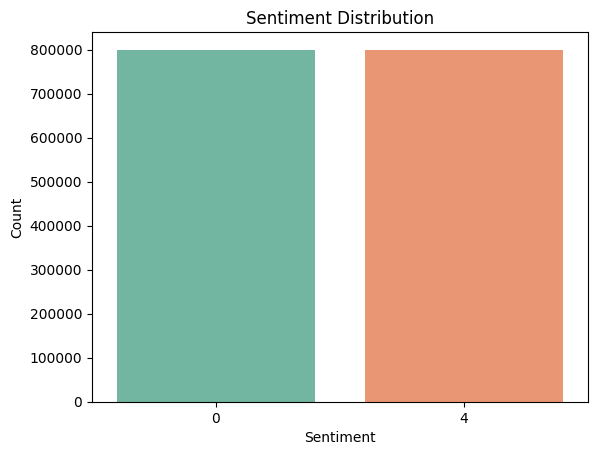

In [6]:
sns.countplot(x='target', data=twitter_data, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Data Cleaning

In [7]:
print(twitter_data.isnull().sum())
print("\n\n")
print(twitter_data.duplicated().sum())
print("\n\n")
twitter_data = twitter_data.drop_duplicates()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64



0





In [8]:
print(twitter_data['target'].value_counts())
print("\n\n")
twitter_data.replace({'target': {4: 1}}, inplace=True)
print("\n\n")
print(twitter_data['target'].value_counts())

target
0    800000
4    800000
Name: count, dtype: int64






target
0    800000
1    800000
Name: count, dtype: int64


# Importing Stop Words

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [10]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Using PorterStemmer for Word Stemming

In [11]:
port_stem = PorterStemmer()

# Stemming

In [12]:
def stemming(content):

    stemmed_content = re.sub('[^a-zA-Z]',' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)

    return stemmed_content

In [13]:
twitter_data['stemmed_content'] = twitter_data['text'].apply(stemming)

# Analyzing Tweet Lengths

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


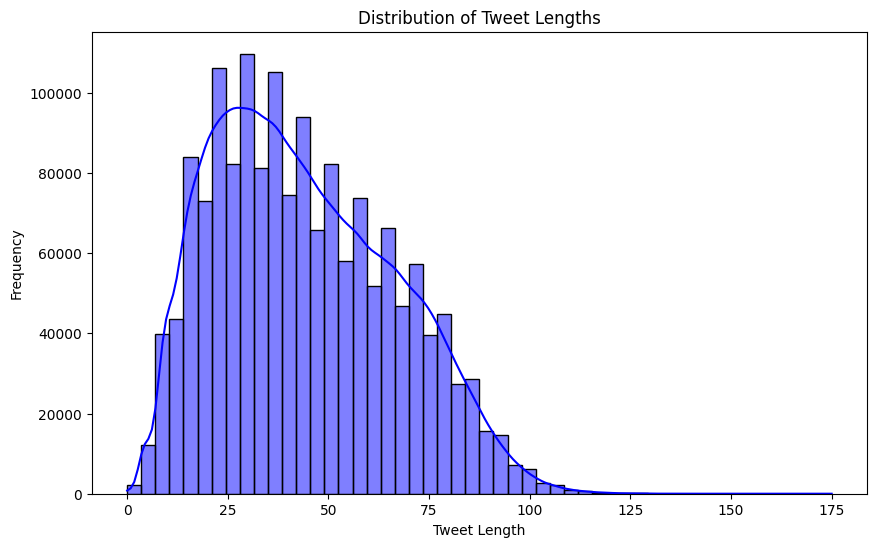

In [14]:
twitter_data['text_length'] = twitter_data['stemmed_content'].apply(len)


plt.figure(figsize=(10, 6))
sns.histplot(twitter_data['text_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()


# Generating Word Clouds for Positive and Negative Tweets

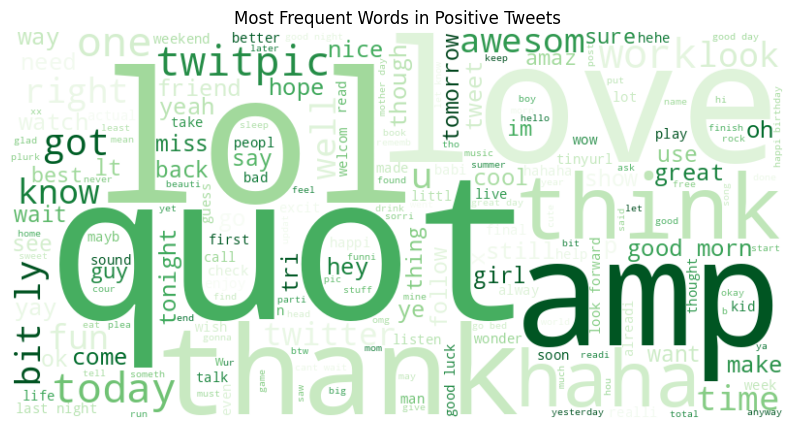

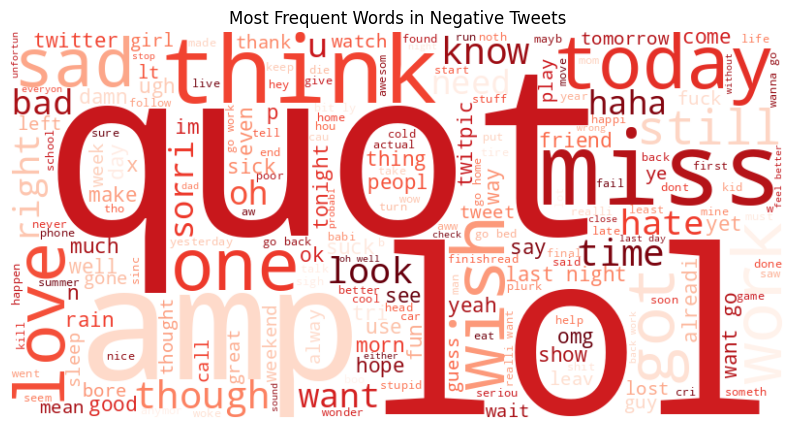

In [15]:
positive_tweets = twitter_data[twitter_data['target'] == 1]
negative_tweets = twitter_data[twitter_data['target'] == 0]

positive_words = ' '.join(positive_tweets['stemmed_content'])
negative_words = ' '.join(negative_tweets['stemmed_content'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Positive Tweets')
plt.show()

wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Negative Tweets')
plt.show()


In [16]:
twitter_data.head()

,target,id,date,flag,user,text,stemmed_content,text_length
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...,75
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...,65
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...,53
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire,31
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see,29


# Preparing Data for Model Training

In [17]:
twitter_data.drop(['text'], axis =1,inplace = True)

In [18]:
X = twitter_data['stemmed_content'].values
Y = twitter_data['target'].values

# Splitting Data into Training and Testing Sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.01, stratify = Y, random_state = 42)

# Vectorizing the Data (TF-IDF)

In [20]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Training the Logistic Regression Model

In [21]:
model = LogisticRegression(max_iter=10000)

In [22]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

# Evaluating the Model Performance

In [23]:
y_pred = model.predict(X_test)

print('Accuracy Score', accuracy_score(y_test, y_pred))
print('\nPrecision Score', precision_score(y_test, y_pred))
print('\nRecall Score', recall_score(y_test, y_pred))
print('\nf1 Score', f1_score(y_test, y_pred))


print('\nClassification Report\n',classification_report(y_test, y_pred))

Accuracy Score 0.7743125

Precision Score 0.7588769611890999

Recall Score 0.804125

f1 Score 0.7808460277963222

Classification Report
               precision    recall  f1-score   support

           0       0.79      0.74      0.77      8000
           1       0.76      0.80      0.78      8000

    accuracy                           0.77     16000
   macro avg       0.78      0.77      0.77     16000
weighted avg       0.78      0.77      0.77     16000



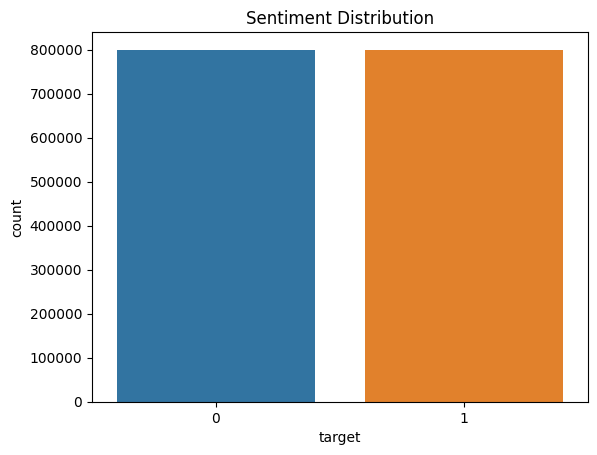

In [24]:
sns.countplot(x='target', data=twitter_data)
plt.title('Sentiment Distribution')
plt.show()

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Visualizing Confusion Matrix

In [28]:
print('Confusion Matrix', )
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[5956 2044]
 [1567 6433]]


# Predicting Sentiment on New Text

In [25]:
def predict_sentiment(text):
    preprocessed_text = stemming(text)

    text_vector = vectorizer.transform([preprocessed_text])

    prediction = model.predict(text_vector)

    sentiment = 'Positive' if prediction[0] == 1 else 'Negative'

    return sentiment


In [26]:
example_texts = [
    "I love this product! It's amazing.",
    "This is the worst experience I have ever had.",
    "The service was okay, not too good or too bad.",
    "Fantastic! Highly recommend it.",
    "I am not happy with the quality."
]

for text in example_texts:
    sentiment = predict_sentiment(text)
    print(f"Text: {text}\nSentiment: {sentiment}\n")


Text: I love this product! It's amazing.
Sentiment: Positive

Text: This is the worst experience I have ever had.
Sentiment: Negative

Text: The service was okay, not too good or too bad.
Sentiment: Negative

Text: Fantastic! Highly recommend it.
Sentiment: Positive

Text: I am not happy with the quality.
Sentiment: Positive

